<a href="https://colab.research.google.com/github/ArvindReddyC/Digital_Twin_self/blob/main/Prediction%20Model/Consumption_KNN_model/v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Modules required

In [11]:
import pandas as  pd
import numpy as np
from json import JSONEncoder
import requests
import matplotlib.pyplot as plt 
import time
import joblib

from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split
import sklearn
import math

### Notes 

1. We are predicting both the production and the consumtion when we are given the 
2. Active Energy Or Active energy delivered interval is more appropriate than Acitve Power 

#### Doubts 

1. How many parameters to use .? Suggested is as many as possible cos more parameters more good the data.
2. Should I take time into consideration .? try doing with and without time and pick which is better. 

In [2]:

pickle_obj  = '' # Initialising Global Variables 
model =  '' 
Knn_model = ''

@app.route('/ConsumptionTraining', methods=['GET'])
def ConsumptionTraining():
    global Knn_model
    Knn_model = KNN_training()
    return "success"


if __name__ == '__main__':
    bus.run()
    listen_kill_server()
    pickle_obj,model = bootstrap()
    Knn_model =   KNN_training()
    app.run(host="0.0.0.0", port=os.environ.get("PORT"), debug=True)



@app.route('/simSoleilConsumption', methods=['POST'])
def simSoleilConsumption():
    global Knn_model
    if not request.json:
        return jsonify({'statusCode': 400,'message':'Invalid data provided'}), 400
    print(request.json)
    userInputs = request.json
    result = predict_consumption(Knn_model ,  userInputs)
    return jsonify({'statusCode': 200,'message':'Success','data': result}), 200




NameError: name 'app' is not defined

### Functions 

### DateTimeEncoder

In [12]:
class DateTimeEncoder(JSONEncoder):
        #Override the default method
        def default(self, obj):
            if isinstance(obj, (datetime.date, datetime.datetime)):
                return obj.isoformat()

### get_data

In [14]:
def get_data(id,attri,start_date , end_date):
    ''' 
    Edit this if your running a cron Job 
    queryTimeDiff = datetime.timedelta(minutes=90)
    endDate = datetime.datetime.now()
    startDate = datetime.datetime.now() - queryTimeDiff
    '''
    
    #Change the start data and End Data for longer duration 
    query = {'id':id,'attributes':attri,'startDate':start_date,'endDate':end_date}
    query = DateTimeEncoder().encode(query)
    query = eval(query)
    response = requests.get('http://54.206.42.58:8006/api/v2/historicalData/getObjectAttributeHistoricalData', params=query)

    data = response.json()
    #print(data)
    exportedData = data["data"]["ObjectData"]
    from_Iynkaran = pd.DataFrame(exportedData)

    #print(from_Iynkaran.head(5))
    pivoted = from_Iynkaran.pivot( index= 'measurementtimestamp' , columns='attributeserviceid' , values= 'value' )
    pivoted.replace(np.nan, 0 , inplace=True)
    #pivoted.rename( columns={ 'Irradiance Global (W/m^2)': 'irradiance' , 'Back-of-Module Temperature 2 (deg C)' : 'backtmp2' , 'Active Power' : 'activepower'   } , inplace=True )
    
    return pivoted


In [15]:
from_API = get_data('WP_HVW_SWB.1J07_PM_WestFdr,WP_SF_MVPS4.WS1','Active Power,Irradiance Global (W/m^2),Back-of-Module Temperature 2 (deg C)','2021-01-01 00:00:00' , '2021-12-31 00:00:00')



In [ ]:
from_API = from_API.astype(float)
X_train, X_test, y_train, y_test = train_test_split(from_API[['Irradiance Global (W/m^2)'	,'Back-of-Module Temperature 2 (deg C)']] , from_API['Active Power'] ,
test_size=0.25) 
neigh = KNeighborsRegressor(n_neighbors=1000)
neigh.fit(X_train.to_numpy(),y_train)
predictions = neigh.predict(X_test.to_numpy())
mse = sklearn.metrics.mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
print(rmse)

joblib.dump(neigh, '/Users/arvindchandrasekarreddy/Desktop/PythonProjects/Digital_Twin_self/Prediction_Model/Consumption_KNN_model/KNN_2.sav')

#### Visualisation

NameError: name 'df' is not defined

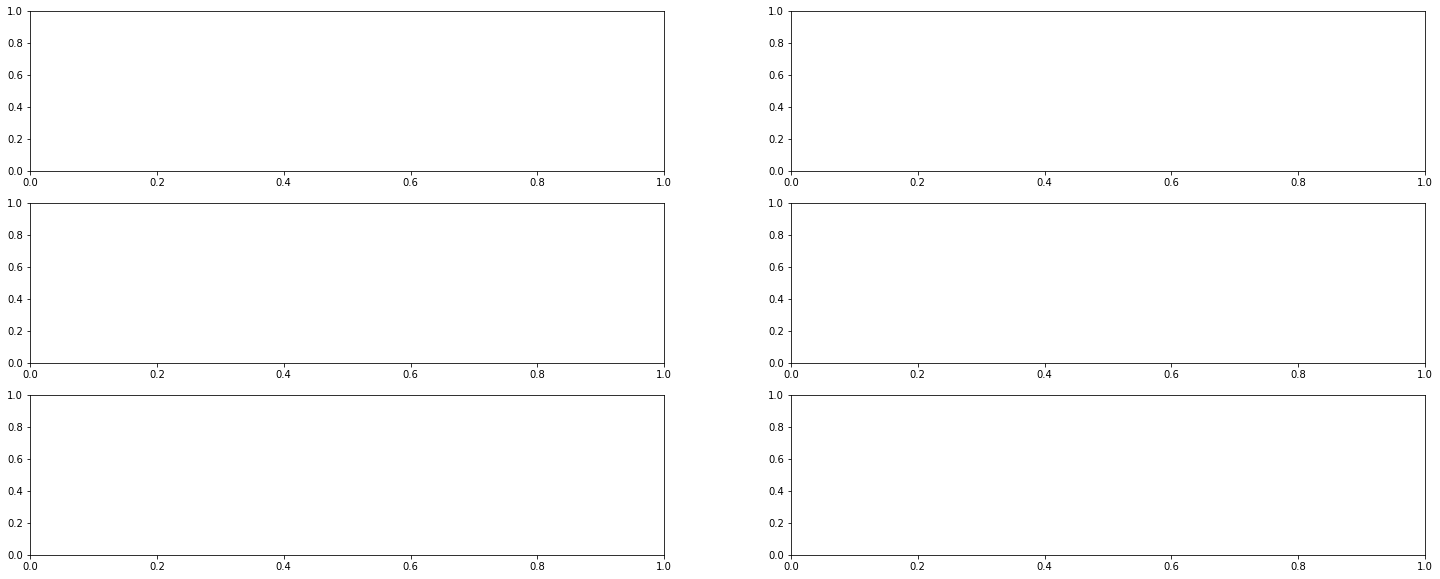

In [8]:

fig,ax =  plt.subplots( 3,2  , figsize = (25,10))
ax[0,0].plot( from_Iynkaran.index , from_Iynkaran['Active Power'].astype(float)  )
ax[0,1].plot( from_Iynkaran.index , from_Iynkaran['Rainfall (mm)'].astype(float)  )
ax[1,0].plot( from_Iynkaran.index , from_Iynkaran['Irradiance Global (W/m^2)'].astype(float)  )
ax[1,1].plot( from_Iynkaran.index , from_Iynkaran['Weather Atmospheric Pressure'].astype(float)  )
ax[2,0].plot( from_Iynkaran.index , from_Iynkaran['Ambient Temperature Celsius'].astype(float)  )


#### Based on the Evidence above we will use 


1.   Active Power 
2.   Back-of-Module Temperature (deg C)
3.   Irradiance Global (W/m^2)
4.   Irradiance Plane-of-Array (W/m^2) 






In [9]:
#Function to build a model given a independent and dependent variables

def main( independent , dependent  ):
    from_Iynkaran = get_data('WP_HVW_SWB.1J07_PM_WestFdr,WP_SF_MVPS4.WS1','Active Power,Irradiance Global (W/m^2),Back-of-Module Temperature 2 (deg C)','2021-01-01 00:00:00' , '2021-12-31 00:00:00')
    subset_from_Iynkaran = from_Iynkaran['Active Power,Irradiance Global (W/m^2),Back-of-Module Temperature 2 (deg C)'].astype(float)
    print(subset_from_Iynkaran.dtypes)
    X_train, X_test, y_train, y_test = train_test_split(subset_from_Iynkaran , dependent ,
    test_size=0.25) 
    neigh = KNeighborsRegressor(n_neighbors=100,algorithm='brute')
    neigh.fit(X_train,y_train)
    predictions = neigh.predict(X_test)
    mse = sklearn.metrics.mean_squared_error(y_test, predictions)
    rmse = math.sqrt(mse)
    print(rmse)



In [10]:
main(['Irradiance Global (W/m^2)' , 'Back-of-Module Temperature 2 (deg C)'],from_Iynkaran['Active Power'].astype(float))

NameError: name 'df' is not defined

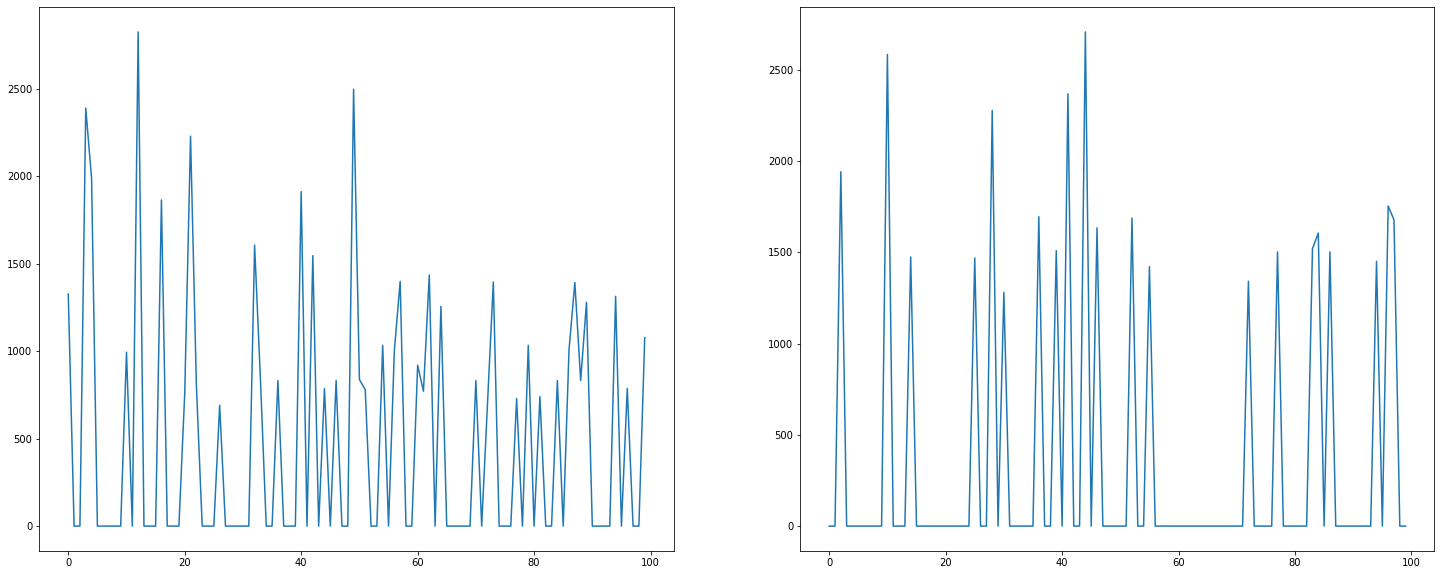

In [70]:
fig,ax =  plt.subplots( 1,2  , figsize = (25,10))
ax[0].plot( list(np.arange(0,(len(y_test))  , 1))[:100]  , list(predictions)[:100] )
ax[1].plot( list(np.arange(0,(len(y_test))  , 1))[:100]  , list(y_test)[:100] )

#### Exploring the data from Digital Twin Downloades 

In [11]:
pf = pd.read_csv('/Users/arvindchandrasekarreddy/Desktop/PythonProjects/Digital_Twin_self/Prediction_Model/Consumption_KNN_model/csv_RJ9JC22Pk6EcgnQVdXuw.csv')

##### Difference Observed 

In [20]:
pf[ pf.measurementtimestamp == '2021-01-01T02:15:00.000Z' ]

,objectid,attributeserviceid,measurementtimestamp,value
31813,WP_SF_MVPS4.WS1,Back-of-Module Temperature 2 (deg C),2021-01-01T02:15:00.000Z,15.3
34790,WP_SF_MVPS4.WS1,Irradiance Global (W/m^2),2021-01-01T02:15:00.000Z,0.0


In [30]:
from_API.loc['2021-01-01T02:15:00.000Z']

attributeserviceid
Active Power                               0
Back-of-Module Temperature 2 (deg C)    46.3
Irradiance Global (W/m^2)               1159
Name: 2021-01-01T02:15:00.000Z, dtype: object

### Prediction by Iynkaran Data 

In [31]:
from_Iynkaran = pd.read_csv('cleaned_data.csv' , index_col=1   )
from_Iynkaran.drop('Unnamed: 0' , inplace = True , axis = 1)

main = pd.concat([ from_Iynkaran ,from_API] , axis = 1 , join = 'inner')
Fusion_API_Iynkaran = main.iloc[:,[0,1,3]]
Fusion_API_Iynkaran

,Irradiance Global (W/m^2),Back-of-Module Temperature 2 (deg C),Active Power
measurementtimestamp,,,
2021-01-01T00:00:00.000Z,0,15.5,0
2021-01-01T00:15:00.000Z,0,15.7,0
2021-01-01T00:30:00.000Z,0,15.9,0
2021-01-01T00:45:00.000Z,0,15.9,0
2021-01-01T01:00:00.000Z,0,15.5,0
...,...,...,...
2021-11-16T01:35:00.000Z,0,3.9,2944.641845703125
2021-11-16T01:40:00.000Z,0,4.0,2715.785888671875
2021-11-16T01:45:00.000Z,0,4.1,2604.013671875


In [29]:
Fusion_API_Iynkaran.to_csv('Cleaned_data_.csv')

In [50]:
Fusion_API_Iynkaran = Fusion_API_Iynkaran.astype(float)
X_train, X_test, y_train, y_test = train_test_split(Fusion_API_Iynkaran[['Irradiance Global (W/m^2)'	,'Back-of-Module Temperature 2 (deg C)']] , Fusion_API_Iynkaran['Active Power'] ,
test_size=0.25) 
neigh = KNeighborsRegressor(n_neighbors=500)
neigh.fit(X_train.to_numpy(),y_train)
predictions = neigh.predict(X_test.to_numpy())
mse = sklearn.metrics.mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
print(rmse)

428.5305640360547


In [64]:
joblib.dump(neigh, '/Users/arvindchandrasekarreddy/Desktop/PythonProjects/Digital_Twin_self/Prediction_Model/Consumption_KNN_model/KNN_2.sav')

['/Users/arvindchandrasekarreddy/Desktop/PythonProjects/Digital_Twin_self/Prediction_Model/Consumption_KNN_model/KNN_2.sav']

### Prediction from Digital Twin downloaded data. 

In [72]:
pf = pd.read_csv('/Users/arvindchandrasekarreddy/Desktop/PythonProjects/Digital_Twin_self/Prediction_Model/Consumption_KNN_model/csv_RJ9JC22Pk6EcgnQVdXuw.csv')
pf_main = pf.pivot_table( index='measurementtimestamp' , columns='attributeserviceid' , values='value' )
pf_main.fillna(0,inplace = True)
pf_main

attributeserviceid,Active Power,Back-of-Module Temperature 2 (deg C),Irradiance Global (W/m^2)
measurementtimestamp,,,
2021-01-01T00:15:00.000Z,0.000000,15.700000,0.0
2021-01-01T00:30:00.000Z,0.000000,15.900000,0.0
2021-01-01T00:45:00.000Z,0.000000,15.900000,0.0
2021-01-01T01:00:00.000Z,0.000000,15.500000,0.0
2021-01-01T01:15:00.000Z,0.000000,15.100000,0.0
...,...,...,...
2021-12-31T12:35:00.000Z,2665.728271,44.299999,1157.0
2021-12-31T12:40:00.000Z,2655.661865,46.200001,1155.0
2021-12-31T12:45:00.000Z,2648.957275,45.500000,1160.0


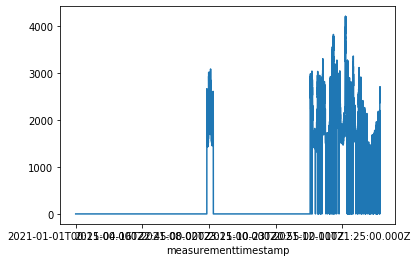

In [74]:

pf_main['Active Power'].plot(  )
plt.xticks( ' ')

In [77]:
Consumption_2021 = pd.read_csv('/Users/arvindchandrasekarreddy/Desktop/PythonProjects/Digital_Twin_self/Prediction_Model/Consumption_KNN_model/Consumption_2021.csv')

In [89]:
pivoted_Consumption_2021 = Consumption_2021.pivot_table( index = 'measurementtimestamp' , columns='attributeserviceid' , values='value')
pivoted_Consumption_2021

attributeserviceid,Active Power
measurementtimestamp,
2021-07-30T15:00:00.000Z,2529.064209
2021-07-30T15:15:00.000Z,2496.112061
2021-07-30T15:30:00.000Z,2553.433105
2021-07-30T15:45:00.000Z,2487.962158
2021-07-30T16:00:00.000Z,2494.855957
...,...
2021-12-30T23:40:00.000Z,1324.255981
2021-12-30T23:45:00.000Z,1287.101440
2021-12-30T23:50:00.000Z,1322.501221


In [94]:
pivoted_Consumption_2021.index.name

'measurementtimestamp'

In [96]:
merged_all_ =  pivoted_Consumption_2021.merge(pf_main[ pf_main.columns.drop('Active Power') ],on='measurementtimestamp',how='left')

In [141]:
merged_all_

attributeserviceid,Active Power,Back-of-Module Temperature 2 (deg C),Irradiance Global (W/m^2)
measurementtimestamp,,,
2021-07-30T15:00:00.000Z,2529.064209,15.2,175.0
2021-07-30T15:15:00.000Z,2496.112061,14.6,129.0
2021-07-30T15:30:00.000Z,2553.433105,14.1,107.0
2021-07-30T15:45:00.000Z,2487.962158,15.4,169.0
2021-07-30T16:00:00.000Z,2494.855957,15.2,137.0
...,...,...,...
2021-12-30T23:40:00.000Z,1324.255981,13.1,0.0
2021-12-30T23:45:00.000Z,1287.101440,13.1,0.0
2021-12-30T23:50:00.000Z,1322.501221,13.3,0.0


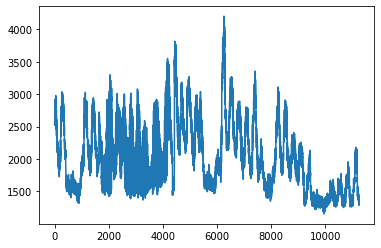

In [81]:
Consumption_2021['value'].plot()

In [97]:
merged_all_.dtypes

attributeserviceid
Active Power                            float64
Back-of-Module Temperature 2 (deg C)    float64
Irradiance Global (W/m^2)               float64
dtype: object

In [204]:
#Fusion_API_Iynkaran = Fusion_API_Iynkaran.astype(float)
X_train, X_test, y_train, y_test = train_test_split(merged_all_[['Irradiance Global (W/m^2)'	,'Back-of-Module Temperature 2 (deg C)']] , merged_all_['Active Power'] ,
test_size=0.25 , random_state = 1 ) 
neigh = KNeighborsRegressor(n_neighbors= 2 )
neigh.fit(X_train.to_numpy(),y_train)
predictions = neigh.predict(X_test.to_numpy())
mse = sklearn.metrics.mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
print(rmse)

579.0191709571525


In [206]:
joblib.dump(neigh, '/Users/arvindchandrasekarreddy/Desktop/PythonProjects/Digital_Twin_self/Prediction_Model/Consumption_KNN_model/KNN_2.sav')


['/Users/arvindchandrasekarreddy/Desktop/PythonProjects/Digital_Twin_self/Prediction_Model/Consumption_KNN_model/KNN_2.sav']

(1000, 4000)

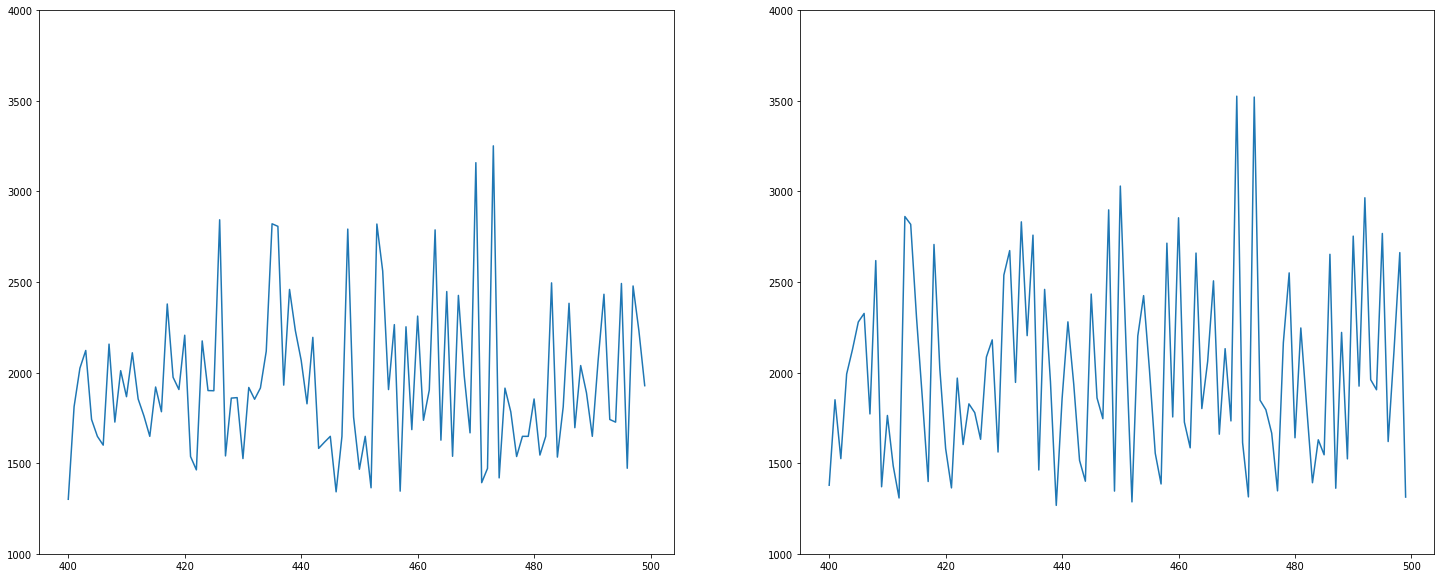

In [205]:
fig,ax =  plt.subplots( 1,2  , figsize = (25,10))
ax[0].plot( list(np.arange(0,(len(y_test))  , 1))[400:500]  , list(predictions)[400:500]   )
ax[0].set_ylim([1000,4000])
ax[1].plot( list(np.arange(0,(len(y_test))  , 1))[400:500]  , list(y_test)[400:500] )
ax[1].set_ylim([1000,4000])

In [51]:
pf_main = pf.pivot_table( index='measurementtimestamp' , columns='attributeserviceid' , values='value' )
pf_main.fillna(0,inplace = True)
pf_main

attributeserviceid,Active Power,Back-of-Module Temperature 2 (deg C),Irradiance Global (W/m^2)
measurementtimestamp,,,
2021-01-01T00:15:00.000Z,0.000000,15.700000,0.0
2021-01-01T00:30:00.000Z,0.000000,15.900000,0.0
2021-01-01T00:45:00.000Z,0.000000,15.900000,0.0
2021-01-01T01:00:00.000Z,0.000000,15.500000,0.0
2021-01-01T01:15:00.000Z,0.000000,15.100000,0.0
...,...,...,...
2021-12-31T12:35:00.000Z,2665.728271,44.299999,1157.0
2021-12-31T12:40:00.000Z,2655.661865,46.200001,1155.0
2021-12-31T12:45:00.000Z,2648.957275,45.500000,1160.0


### Putting it all together for production 

In [209]:
import pandas as pd 
import numpy as np 
import joblib
import pickle


def predict_consumption_power( user_inputs = {} ):
    '''
        for testing comment this before production.
    '''
   

    print('Predicting User Inputs')
    from_Iynkaran_user = pd.DataFrame(data=user_inputs , index = user_inputs['measurementtimestamp'] , columns=['irradiance','temperature'] )
    from_Iynkaran_user.index.name = 'measurementtimestamp'
    from_Iynkaran_user.astype(float)
    '''
    Here we will  if else clauses  
    '''
   
    #model = joblib.load('/Users/arvindchandrasekarreddy/Desktop/PythonProjects/Digital_Twin_self/Prediction_Model/Consumption_KNN_model/KNN.sav')
    model = joblib.load('KNN_2.sav')
    
   
    '''
        for testing comment this before production.
    '''
    
    print('Predicting User Inputs')
    regressor = model
    print(from_Iynkaran_user[['irradiance','temperature']].to_numpy())
    y_user = regressor.predict(from_Iynkaran_user[['irradiance','temperature']].to_numpy())


    predicted_activePower = pd.DataFrame(data=y_user , columns=["ActivePowerPrediction"] , index = user_inputs['measurementtimestamp'] )
    predicted_activePower.index.name = 'measurementtimestamp'


    return predicted_activePower.reset_index().to_dict( orient = 'records' )




In [210]:

predict_consumption_power({'measurementtimestamp': ['01', '02', '03'],
                'irradiance': [400, 520 ,400 ], 
                'temperature': [20, 24, 10]} )


Predicting User Inputs
Predicting User Inputs
[[400  20]
 [520  24]
 [400  10]]


[{'measurementtimestamp': '01', 'ActivePowerPrediction': 2551.915771484375},
 {'measurementtimestamp': '02', 'ActivePowerPrediction': 1517.814208984375},
 {'measurementtimestamp': '03', 'ActivePowerPrediction': 3042.4261474609375}]